# CMSC 636, Project: cheXpert analysis
## Basic CNN approach

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from types import SimpleNamespace
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 1. Load MNIST

In [2]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Normalize to [0, 1]
    x_train = x_train.astype(np.float32) / 255.0
    x_test  = x_test.astype(np.float32) / 255.0

    # Reshape to (batch, height, width, channels)
    x_train = np.expand_dims(x_train, axis=-1)  # shape: (60000, 28, 28, 1)
    x_test  = np.expand_dims(x_test, axis=-1)   # shape: (10000, 28, 28, 1)

    # One-hot encode labels
    y_train = to_categorical(y_train, num_classes=10)
    y_test  = to_categorical(y_test, num_classes=10)

    return (x_train, y_train), (x_test, y_test)

# 2. Model definition

In [3]:
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, (5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

2025-04-01 23:50:38.812008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-01 23:50:38.812029: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-04-01 23:50:38.812034: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-04-01 23:50:38.812048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-01 23:50:38.812060: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


* `Input(shape=(28,28,1))`: Defines the shape of the input.
* `Conv2D(32, (5,5), activation='relu', padding='valid')`: A single greyscale image = 1, 32 filters each producing an output, the filter for the input image being a 5x5 convolution, and a ReLU activation. Output will be 24x24.
* `MaxPooling2D(pool_size=(2,2), strides=2)`: Pooling from the convolutional layer. Halves the size to 12x12.
* `Conv2D(64, (5,5), activation='relu')`: 32 outputs of the previous layer. This layer has 64 filters to apply to this, each searching for their own features. The convolution at this layer is 5x5. Output will be 8x8. ReLU activation.
* `MaxPooling2D(pool_size=(2,2), strides=2)`: Pooling from the convolutional layer. Halves the size to 4x4.
* `Flatten()`: Reduces 4x4 over 64 filters (1024 elements) to a single dimension vector.
* `Dense(256, activation='relu')`: A hidden layer. Input is the 1024 from the previous layer, and outputs 256 elements. ReLU was also defined.
* `DenseLayer(10, activation='softmax')`: Output layer. Input is 256, output is 10. Softmax as the activation function.

# 3. Compile

In [4]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=CategoricalCrossentropy(),
              metrics=[CategoricalAccuracy()])

In [5]:
num_steps = 5000
summary_freq = 200
n_test_log = 10
epochs = 10

batch_size= 100

## Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Train

In [7]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10


2025-04-01 23:50:39.347449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - categorical_accuracy: 0.8784 - loss: 0.3871 - val_categorical_accuracy: 0.9840 - val_loss: 0.0495
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9822 - loss: 0.0577 - val_categorical_accuracy: 0.9848 - val_loss: 0.0506
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9864 - loss: 0.0417 - val_categorical_accuracy: 0.9886 - val_loss: 0.0383
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9890 - loss: 0.0356 - val_categorical_accuracy: 0.9899 - val_loss: 0.0351
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9901 - loss: 0.0370 - val_categorical_accuracy: 0.9907 - val_loss: 0.0348
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9916 - loss: 0.0306 - val_categorical_accuracy: 0.9890 - val_loss: 0.0487
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - categorical_accuracy: 0.9906 - loss: 0

# Reset and retrain

# 4. Test the training model on the testing dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.9820 - loss: 0.2453
Test accuracy: 98.58% | Test loss: 0.186865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: 9
Labeled: 9


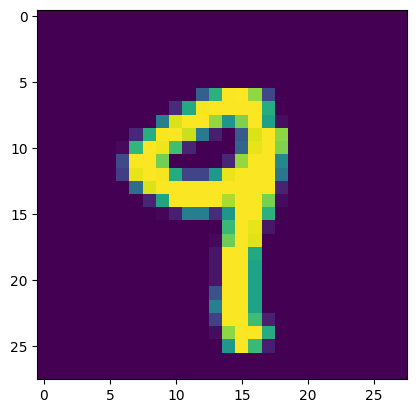

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2%} | Test loss: {test_loss:.6}")

# For a single image
i = np.random.randint(len(x_test))
x_sample = x_test[i]
y_sample = y_test[i]
image = x_sample[np.newaxis, ...]
pred = model.predict(image)
print("Predicted class:", pred.argmax())
print("Labeled:", y_sample.argmax())

plt.imshow(np.squeeze(image))